# Martial Arts

## KD Project Group 75

Part 1 

Purpose, origin, popularity, equipment

Start story here

Mah Seev Dongh wants to learn a new martial art cause hes badass like that.

he wants to know which martial arts are an Olympic sport so he can beat ***errone's*** asses and win dem gold medals.

Here is a list of martial arts which mentions whether they are olympically practiced or nah

In [36]:
%load_ext ipython_sparql_pandas     
%matplotlib inline

import pandas as pd                    #pip install pandas
import matplotlib.pyplot as plt        #pip install matplotlib
import seaborn as sns                  #pip install seaborn
sns.set(style="darkgrid")

The ipython_sparql_pandas extension is already loaded. To reload it, use:
  %reload_ext ipython_sparql_pandas


In [66]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
select ?Name ?OlympicStatus ?Purpose where {
    ?z rdfs:label ?Name .
    ?z ma:primaryPurpose ?Purpose .
  SERVICE <https://dbpedia.org/sparql> {
     ?s dbp:olympic ?OlympicStatus .
     ?s rdfs:label ?Name .
     FILTER (str(?OlympicStatus)!="No") .
 }
} order by ?Purpose

In [67]:
# Styling: https://pandas.pydata.org/docs/user_guide/style.html
# Using CSS Hue-Saturation-Level colors: https://www.w3schools.com/colors/colors_hsl.asp

def purpose_color(purpose):
    colours = {"Self-defence":120, "Sport": 0}
    return f'background: hsl({colours.get(str(purpose).split("#")[-1], 230)}, 60%, 50%)' 

MartialArt.style \
    .applymap(purpose_color, subset=(slice(None), "Purpose"))

,Name,OlympicStatus,Purpose
0,Boxing,688,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
1,Boxing,1904,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
2,Judo,* Accepted as an Olympic sport in 1960 * Contested since 1964 and 1992,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
3,Karate,Debuted in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
4,Karate,Will debut in 2021,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
5,Muay Thai,"No, but IOC recognized",http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
6,Savate,only the 1924 Summer Olympics,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
7,Wrestling,"Freestyle, Greco-Roman, and Judo",http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Self-defence
8,Istunka,no,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Spiritual
9,Boxing,688,http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#Sport


## Part 2
olympic sport, dutch dataset(location), technical focus

Continue story here

In [65]:
%%sparql http://AVLaptop:7200/repositories/KDProject -s MartialArt
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
select * where { 
    ?s ma:primaryPurpose ma:Self-defence .
    ?s rdf:type ma:ChineseMartialArt .
    ?s rdfs:label ?p
}

,s,p
0,http://www.semanticweb.org/guoda/ontologies/20...,Soo Bahk Do
1,http://www.semanticweb.org/guoda/ontologies/20...,Tang Soo Do
2,http://www.semanticweb.org/guoda/ontologies/20...,Tang Soo Do
3,http://www.semanticweb.org/guoda/ontologies/20...,Taekkyeon
4,http://www.semanticweb.org/guoda/ontologies/20...,Taekwondo
5,http://www.semanticweb.org/guoda/ontologies/20...,Hap Ki Do
6,http://www.semanticweb.org/guoda/ontologies/20...,Hap Ki Do
7,http://www.semanticweb.org/guoda/ontologies/20...,Subak
8,http://www.semanticweb.org/guoda/ontologies/20...,Tae Kwon Do


In [4]:
## Insert Pandas code here

## Part 3 
AncestorOf

Continue Story here

In [26]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -q -s MartialArt
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
select ?martialArt (count(?z) as ?descendants) where {
   ?s rdfs:label ?martialArt .
   ?s dbp:descendantArts ?z .
    
}  GRoup by ?martialArt

<AxesSubplot:ylabel='martialArt'>

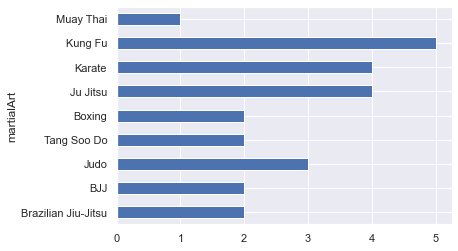

In [27]:
MartialArt.set_index('martialArt', inplace=True)## Pandas
MartialArt['descendants'].plot.barh()

## Conclusion??

??

In [95]:
%%sparql http://DESKTOP-TRJNVQU:7200/repositories/projectkd -s MartialArt
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
PREFIX ma: <http://www.semanticweb.org/guoda/ontologies/2021/9/untitled-ontology-44#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
select distinct ?a ?p ?o where { 
    ?s ma:accomodatesSportType ?b .
    ?b rdf:type ma:MartialArt .
    ?s rdfs:label ?a .
	?s geo:lat ?p .
    ?s geo:long ?o
}  

,a,p,o
0,heksenberg,324850.0,196062.0
1,Sportcentrum Sloten,483736.0,115625.0
2,Sportcentrum Universiteit Twente,473881.0,254943.0
3,Amstelhof Health Club,473195.0,114875.0
4,Kennemer Sportcentrum,490558.0,103268.0
...,...,...,...
145,sportcentrum sportvision,387802.0,158654.0
146,sportcentrum ijsselmuiden,508495.0,191232.0
147,Sportcentrum De Pijp,484764.0,121376.0
148,Gymzaal Christinastraat,454543.0,97428.0


In [106]:
from pyproj import Proj, transform
import folium # pip install folium
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
#capitals_coords = capitals.join(capitals.coords.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))
inProj = Proj('epsg:28992')
outProj = Proj('epsg:4326')

#coords = MartialArt.join(transform(inProj,outProj,MartialArt.p, MartialArt.o))

middle = [52,5]
m = folium.Map(location=middle, zoom_start=7)
for _, row in MartialArt.iterrows():
    folium.CircleMarker(
        location=transform(inProj,outProj,int(row['o']), int(row['p'])),
        radius= 10,
        popup= row['a'],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(m)

m

# x1,y1 = 115625,483736
# x2,y2 = transform(inProj,outProj,x1,y1)
# print (x2,y2)



<ipython-input-106-da4b2cf110e8>:14: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  location=transform(inProj,outProj,int(row['o']), int(row['p'])),
